In [ ]:
%pip install numpy pandas scikit-learn matplotlib seaborn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the data
url_dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url_dataset)

In [5]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
612,2014,KIA,FORTE KOUP,COMPACT,2.0,4,M6,X,9.8,7.2,8.6,33,198
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
144,2014,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,X,13.7,8.7,11.5,25,264
293,2014,DODGE,AVENGER,MID-SIZE,2.4,4,A4,X,11.2,8.0,9.8,29,225
928,2014,ROLLS-ROYCE,WRAITH,MID-SIZE,6.6,12,A8,Z,18.7,11.8,15.6,18,359


# Data Dictionary
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature. 

In [8]:
# Exploring the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
# Select features
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.sample(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
192,6.2,8,12.7,292
259,1.2,4,6.9,159
329,3.6,6,12.4,285
520,2.0,4,10.5,242


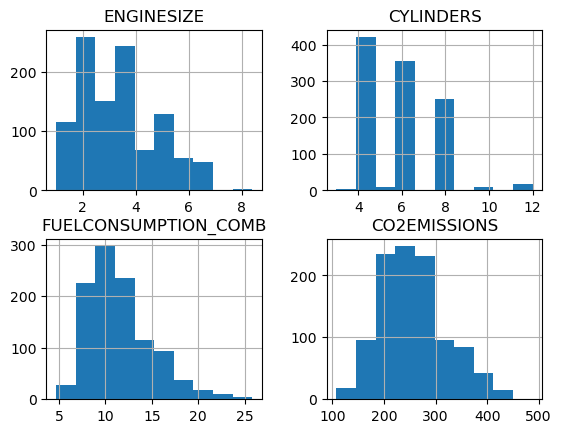

In [10]:
# Visualize features
viz = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]] # copy
viz.hist()
plt.show()

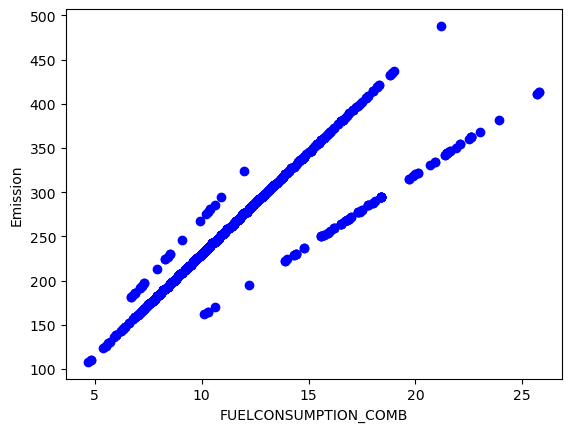

,FUELCONSUMPTION_COMB,CO2EMISSIONS
FUELCONSUMPTION_COMB,1.000000,0.892129
CO2EMISSIONS,0.892129,1.000000


In [ ]:
# display scatter plot of fuel consumption comb against the CO2 emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# Strong linear relationships -> 0.89 pearson coefficient value close to 1
cdf[["FUELCONSUMPTION_COMB", "CO2EMISSIONS"]].corr()

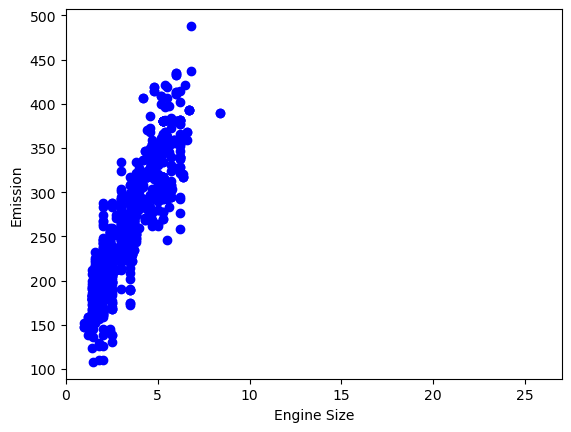

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


In [ ]:
# scatter plot of engine size against co2 emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.xlim(0,27) # to compare against the previous scatter
plt.show()

# The correlation is quite linear -> 0.874 close to 1
cdf[["ENGINESIZE", "CO2EMISSIONS"]].corr()

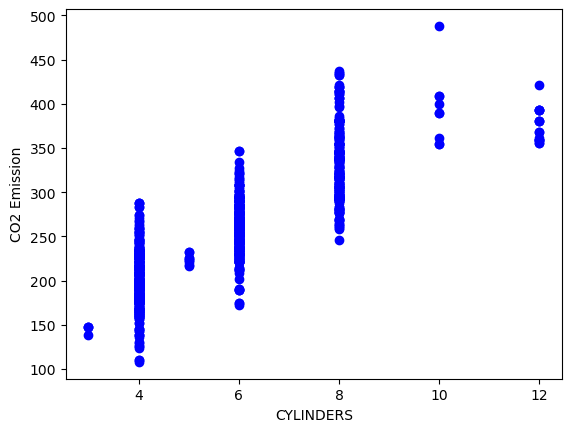

,CYLINDERS,CO2EMISSIONS
CYLINDERS,1.000000,0.849685
CO2EMISSIONS,0.849685,1.000000


In [ ]:
# scatter plot of cylinder against co2 emissions
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

# The correlation is quite linear -> 0.849 close to 1
cdf[["CYLINDERS", "CO2EMISSIONS"]].corr()

In [26]:
# Building the model
## Extracting input feature and target output variable
X = cdf.ENGINESIZE.to_numpy()
Y = cdf.CO2EMISSIONS.to_numpy()

## Create train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(type(X_train), np.shape(X_train), np.shape(X_train))

<class 'numpy.ndarray'> (853,) (853,)


In [27]:
## Build a simple linear regression model
from sklearn import linear_model

### Create a model object
regressor = linear_model.LinearRegression()

### train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1,1), y_train)

print("Coefficients: ", regressor.coef_[0])
print("Intercept: ", regressor.intercept_)

Coefficients:  38.99297872443403
Intercept:  126.28970217408735


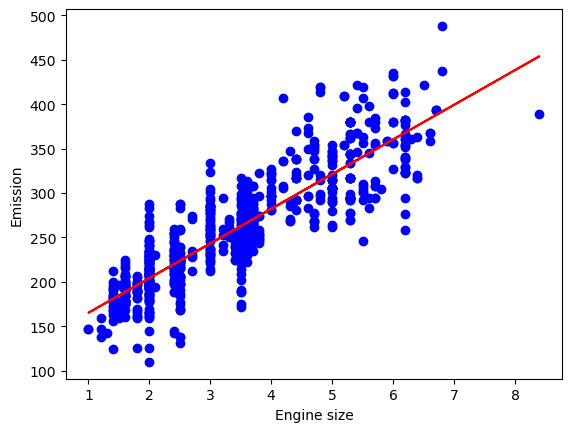

In [28]:
## Visualize model outputs
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score

## Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

# the r2-score is 0.68 it is a decent fit

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


c:\Users\melod\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


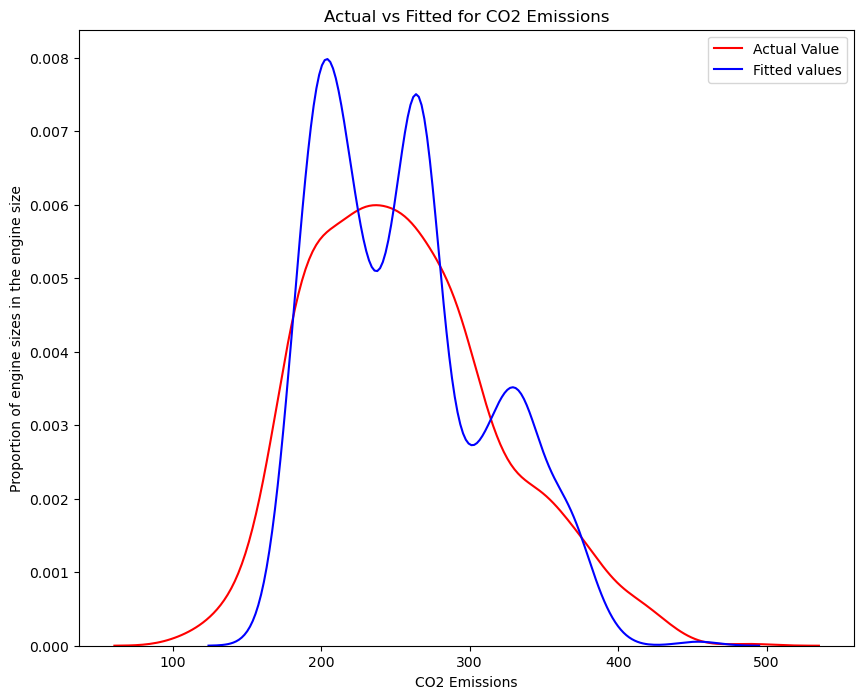

In [35]:
plt.figure(figsize=(10,8))

Y_hat = regressor.predict(cdf[['ENGINESIZE']])
# change from displot with hist=False to histplot, kdeplot and ecdfplot
ax1 = sns.kdeplot(cdf['CO2EMISSIONS'], color="r", label="Actual Value") 
sns.kdeplot(Y_hat, color="b", label="Fitted values", ax=ax1)

plt.title("Actual vs Fitted for CO2 Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Proportion of engine sizes in the engine size")
plt.legend()

plt.show()
plt.close()